In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA as PCA

import os
import requests
from zipfile import ZipFile

pd.set_option('precision', 3)

# Household power consumption (Part 1)
[Data source](https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption)

In [26]:
def download_power_ds():
    if not os.path.exists("data"):
        os.makedirs("data")    

    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip"
    response = requests.get(url)
    if response.status_code != 200:
        raise ValueError

    with open("data/household_power_consumption.zip", 'wb') as file:
        for chunk in response:
            file.write(chunk)

    with ZipFile("data/household_power_consumption.zip") as zipFile:
        zipFile.extractall("data")

In [21]:
%%time

#if you have not data locally:
#download_power_ds("data")

power = pd.read_csv("data/household_power_consumption.txt", delimiter=';')
power.columns = ['Date', 'Time', 'Active', 'Reactive', 'Voltage', 'Intensity', 'met1', 'met2', 'met3']

CPU times: user 2.42 s, sys: 236 ms, total: 2.65 s
Wall time: 2.66 s


In [4]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Time       object 
 2   Active     object 
 3   Reactive   object 
 4   Voltage    object 
 5   Intensity  object 
 6   met1       object 
 7   met2       object 
 8   met3       float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [5]:
%%time

power['DateTime'] = pd.to_datetime(power['Date'] + '-' + power['Time'], format="%d/%m/%Y-%H:%M:%S")
power.drop(columns = ['Date', 'Time'], inplace=True)
power.set_index('DateTime', inplace=True)

CPU times: user 12 s, sys: 155 ms, total: 12.2 s
Wall time: 12.2 s


In [6]:
%%time
power.drop(power[power.isna().any(axis=1)].index, inplace=True) #drop because task required this

CPU times: user 1.21 s, sys: 62.6 ms, total: 1.27 s
Wall time: 1.33 s


In [7]:
%%time

for column in power.columns:
    power[column] = power[column].astype('float32')

CPU times: user 1.3 s, sys: 133 ms, total: 1.43 s
Wall time: 1.44 s


In [8]:
power.head(10)

,Active,Reactive,Voltage,Intensity,met1,met2,met3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0


In [9]:
def is_integer_column(column):
    return power[column].apply(float.is_integer).all()

for column in power.columns:
    if is_integer_column(column):
        power[column] = power[column].astype('int32')

In [10]:
power.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Active     float32
 1   Reactive   float32
 2   Voltage    float32
 3   Intensity  float32
 4   met1       int32  
 5   met2       int32  
 6   met3       int32  
dtypes: float32(4), int32(3)
memory usage: 70.4 MB


In [11]:
power.head(10)

,Active,Reactive,Voltage,Intensity,met1,met2,met3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0,1,17
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0,1,16
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0,2,17
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0,1,17
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0,1,17
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0,2,17
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0,1,17
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0,1,17
2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0,1,17


## Task 1
Select all rows where Active > 5 kW

In [12]:
power[power['Active'] > 5]

,Active,Reactive,Voltage,Intensity,met1,met2,met3
DateTime,,,,,,,
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0,1,16
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0,2,17
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0,1,17
2006-12-16 17:35:00,5.412,0.470,232.78,23.2,0,1,17
2006-12-16 17:36:00,5.224,0.478,232.99,22.4,0,1,16
...,...,...,...,...,...,...,...
2010-11-22 18:40:00,5.408,0.150,231.50,23.6,48,0,0
2010-11-22 18:41:00,5.528,0.144,232.48,24.6,53,0,0
2010-11-24 07:50:00,5.172,0.050,235.18,22.0,0,38,17


## Task 2
Select all rows where Voltage > 235 V

In [13]:
power[power['Voltage'] > 235]

,Active,Reactive,Voltage,Intensity,met1,met2,met3
DateTime,,,,,,,
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0,1,17
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0,2,17
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0,1,17
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0,1,17
2006-12-16 17:38:00,4.054,0.422,235.24,17.6,0,1,17
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0,0,0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0,0,0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0,0,0


## Task 3
Select all where met2 > met3 from rows where Intensity in \[19,20\]

In [14]:
i_condition = (power['Intensity'] >= 19) & (power['Intensity'] <= 20)
i_subset = power[i_condition]
i_subset

,Active,Reactive,Voltage,Intensity,met1,met2,met3
DateTime,,,,,,,
2006-12-16 17:34:00,4.448,0.498,232.86,19.6,0,1,17
2006-12-16 17:48:00,4.474,0.000,234.96,19.4,0,0,17
2006-12-16 17:57:00,4.512,0.000,233.62,19.2,0,0,17
2006-12-16 18:09:00,4.464,0.136,234.66,19.0,0,37,16
2006-12-16 18:16:00,4.524,0.076,234.20,19.6,0,9,17
...,...,...,...,...,...,...,...
2010-11-24 07:53:00,4.666,0.000,235.72,19.8,0,39,17
2010-11-24 07:54:00,4.694,0.000,236.78,19.8,0,39,18
2010-11-24 07:55:00,4.602,0.000,237.08,19.4,0,40,17


In [15]:
i_subset[i_subset['met2'] > i_subset['met3']]

,Active,Reactive,Voltage,Intensity,met1,met2,met3
DateTime,,,,,,,
2006-12-16 18:09:00,4.464,0.136,234.66,19.0,0,37,16
2006-12-17 01:04:00,4.582,0.258,238.08,19.6,0,13,0
2006-12-17 01:08:00,4.618,0.104,239.61,19.6,0,27,0
2006-12-17 01:19:00,4.636,0.140,237.37,19.4,0,36,0
2006-12-17 01:20:00,4.634,0.152,237.17,19.4,0,35,0
...,...,...,...,...,...,...,...
2010-11-24 07:53:00,4.666,0.000,235.72,19.8,0,39,17
2010-11-24 07:54:00,4.694,0.000,236.78,19.8,0,39,18
2010-11-24 07:55:00,4.602,0.000,237.08,19.4,0,40,17


In [16]:
del i_subset

## Task 4
Select 500000 random unique rows. Calculate mean of all mets.

In [17]:
rnd_row_index = np.random.choice(power.index, 500000, replace=False)
rnd_subset = power.loc[rnd_row_index]
rnd_subset

,Active,Reactive,Voltage,Intensity,met1,met2,met3
DateTime,,,,,,,
2008-04-24 05:18:00,0.344,0.112,240.96,1.4,0,0,1
2010-01-19 18:01:00,2.070,0.000,240.80,8.6,0,0,19
2007-05-11 17:16:00,1.214,0.088,235.39,5.0,0,1,17
2009-10-31 06:34:00,0.220,0.000,241.31,0.8,0,0,1
2009-10-22 00:02:00,0.414,0.200,244.24,1.8,0,0,0
...,...,...,...,...,...,...,...
2008-06-09 13:33:00,0.398,0.076,238.06,2.0,0,0,1
2009-09-04 21:46:00,0.668,0.242,242.01,3.0,0,0,1
2010-02-12 09:01:00,2.870,0.320,238.80,12.0,1,0,19


In [18]:
def print_mean(df : pd.DataFrame, column : str):
    mean = df[column].mean()
    print(f"Mean of {column}: {mean}")

print_mean(rnd_subset, 'met1')
print_mean(rnd_subset, 'met2')
print_mean(rnd_subset, 'met3')

Mean of met1: 1.127548
Mean of met2: 1.294614
Mean of met3: 6.454706


In [19]:
del rnd_subset

## Task 5
From night(>=18:00) rows select all where minute consumption > 6kW

Split this subset by max met and for each select every third from 1 part and every_fourth from 2 part

In [21]:
nigth_subset = power[power.index.hour >= 18]
nigth_subset

,Active,Reactive,Voltage,Intensity,met1,met2,met3
DateTime,,,,,,,
2006-12-16 18:00:00,2.790,0.180,237.52,11.8,0,0,18
2006-12-16 18:01:00,2.624,0.144,238.20,11.0,0,0,17
2006-12-16 18:02:00,2.772,0.118,238.28,11.6,0,0,17
2006-12-16 18:03:00,3.740,0.108,236.93,16.4,0,16,18
2006-12-16 18:04:00,4.928,0.202,235.01,21.0,0,37,16
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0,0,0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0,0,0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0,0,0


In [122]:
night_subset = nigth_subset.resample('Min').sum() #probably several minute is not exists
nigth_subset.isna().all()

Active       False
Reactive     False
Voltage      False
Intensity    False
met1         False
met2         False
met3         False
dtype: bool

In [37]:
nigth_gt6_subset = nigth_subset[nigth_subset['Active'] > 6]
nigth_gt6_subset

,Active,Reactive,Voltage,Intensity,met1,met2,met3
DateTime,,,,,,,
2006-12-16 18:05:00,6.052,0.192,232.93,26.2,0,37,17
2006-12-16 18:06:00,6.752,0.186,232.12,29.0,0,36,17
2006-12-16 18:07:00,6.474,0.144,231.85,27.8,0,37,16
2006-12-16 18:08:00,6.308,0.116,232.25,27.0,0,36,17
2006-12-16 18:35:00,6.072,0.000,232.48,26.4,0,27,17
...,...,...,...,...,...,...,...
2010-11-20 18:44:00,6.374,0.392,228.52,28.2,15,36,16
2010-11-20 18:45:00,6.564,0.430,228.43,29.0,13,40,16
2010-11-20 18:46:00,6.438,0.308,229.26,28.4,13,39,16


In [110]:
indexer = lambda row: np.argmax([row['met1'], row['met2'], row['met3']]) + 1
classes = nigth_gt6_subset.apply(indexer, axis = 1)

print("Count of classes")
np.unique(classes, return_counts=True)[1]

Count of classes


array([1740, 1062,   80])

In [114]:
def get_split_group(df : pd.DataFrame, n: int, classes):
    return df.loc[classes[classes == n].index]

met1_subset = get_split_group(nigth_gt6_subset, 1, classes)
met2_subset = get_split_group(nigth_gt6_subset, 2, classes)
met3_subset = get_split_group(nigth_gt6_subset, 3, classes)

In [208]:
def nth(df : pd.DataFrame, n : int, start : int, end : int):
    indexes = np.arange(start, end, n)      
    return df.iloc[indexes]

def fourth_from_tail(df : pd.DataFrame):
    start = np.floor(len(df) / 2)
    end = len(df)
    return nth(df, 4, start, end)

def third_from_head(df : pd.DataFrame):
    start = 0
    end = np.ceil(len(df) / 2)
    return nth(df, 3, start, end)

In [205]:
third_from_head(met2_subset)

,Active,Reactive,Voltage,Intensity,met1,met2,met3
DateTime,,,,,,,
2006-12-16 18:05:00,6.052,0.192,232.93,26.2,0,37,17
2006-12-16 18:08:00,6.308,0.116,232.25,27.0,0,36,17
2006-12-28 20:58:00,6.386,0.374,236.63,27.0,1,36,17
2006-12-28 21:02:00,8.088,0.262,235.50,34.4,1,72,17
2006-12-28 21:05:00,7.230,0.152,235.22,30.6,1,73,17
...,...,...,...,...,...,...,...
2008-03-23 20:27:00,7.222,0.208,233.36,30.8,0,73,16
2008-03-23 20:30:00,6.952,0.178,234.24,29.6,0,72,17
2008-03-23 20:33:00,6.490,0.196,234.04,27.6,0,72,17


In [207]:
fourth_from_tail(met2_subset)

,Active,Reactive,Voltage,Intensity,met1,met2,met3
DateTime,,,,,,,
2008-04-20 21:03:00,7.798,0.328,231.76,33.6,1,71,17
2008-04-20 21:07:00,7.452,0.346,232.31,32.2,1,68,17
2008-04-20 21:11:00,6.436,0.382,232.10,27.6,1,37,17
2008-04-20 21:15:00,6.200,0.216,232.51,26.6,1,37,17
2008-05-18 20:30:00,6.760,0.236,234.90,29.8,2,52,28
...,...,...,...,...,...,...,...
2010-11-20 18:30:00,6.620,0.314,229.00,29.2,18,34,16
2010-11-20 18:34:00,6.266,0.360,229.82,27.6,14,35,16
2010-11-20 18:38:00,6.302,0.376,229.65,27.8,15,34,17


In [214]:
del met1_subset
del met2_subset
del met3_subset
del classes
del night_gt6_subset
del night_subset

# Credit Approval Data Set (Part 2) 
[Data Source](https://archive.ics.uci.edu/ml/datasets/Credit+Approval)

In [4]:
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data" 
#credit = pd.read_csv(url, header=None, na_values=['?'])

#if you have not data locally, use code before
credit = pd.read_csv("data/credit-approval.csv", header=None, na_values=['?'])
credit

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [83]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       678 non-null    object 
 1   1       678 non-null    float64
 2   2       690 non-null    float64
 3   3       684 non-null    object 
 4   4       684 non-null    object 
 5   5       681 non-null    object 
 6   6       681 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      677 non-null    float64
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [84]:
bool_mask_ft = { 't' : True, 'f' : False }
bool_mask_pm = { '+' : True, '-' : False }

credit[8] = credit[8].map(bool_mask_ft).astype('bool')
credit[9] = credit[9].map(bool_mask_ft).astype('bool')
credit[11] = credit[11].map(bool_mask_ft).astype('bool')
credit[15] = credit[15].map(bool_mask_pm).astype('bool')

In [85]:
print(credit[0].unique())
print(credit[3].unique())
print(credit[4].unique())
print(credit[5].unique())
print(credit[12].unique())

['b' 'a' nan]
['u' 'y' nan 'l']
['g' 'p' nan 'gg']
['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' nan]
['g' 's' 'p']


In [86]:
credit[0] = credit[0].astype('category')
credit[3] = credit[3].astype('category')
credit[4] = credit[4].astype('category')
credit[5] = credit[5].astype('category')
credit[12] = credit[12].astype('category')

In [89]:
correlation = credit.corr()
correlation

,1,2,7,8,9,10,11,13,14,15
1,1.000,0.202,0.396,0.206,0.084,0.186,0.055,-0.080,0.019,0.163
2,0.202,1.000,0.299,0.244,0.175,0.271,-0.013,-0.224,0.123,0.206
7,0.396,0.299,1.000,0.346,0.223,0.322,0.138,-0.077,0.051,0.322
8,0.206,0.244,0.346,1.000,0.432,0.380,0.091,-0.068,0.090,0.720
9,0.084,0.175,0.223,0.432,1.000,0.571,0.017,-0.054,0.078,0.458
10,0.186,0.271,0.322,0.380,0.571,1.000,0.007,-0.120,0.064,0.406
11,0.055,-0.013,0.138,0.091,0.017,0.007,1.000,0.145,0.019,0.032
13,-0.080,-0.224,-0.077,-0.068,-0.054,-0.120,0.145,1.000,0.067,-0.101
14,0.019,0.123,0.051,0.090,0.078,0.064,0.019,0.067,1.000,0.176
15,0.163,0.206,0.322,0.720,0.458,0.406,0.032,-0.101,0.176,1.000


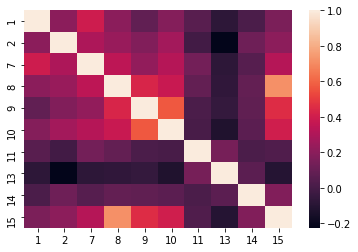

In [90]:
sns.heatmap(correlation)